In [1]:
# %%file importMag.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# import warnings
# warnings.filterwarnings('ignore') # ignore warnings: only use this once you are sure things are working
from IPython.html.widgets import *
from fromFatiando import *
from fromSimPEG import *
from scipy.constants import mu_0

from simpegEM.Utils import coordUtils 

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%matplotlib inline

In [24]:
Einc, Edec = 90.,0. # inclination and declination of earth's field in degrees
Bigrf = 1e-6 #54448e-9
Higrf = Bigrf / mu_0

# define the size and orientation of the prism
depth = 1. # depth of burial 

x1, x2 = -1, 1
y1, y2 = -1, 1
z1, z2 = 2.5, 4.5 #-1e-2+depth, 1e-2+depth
susc = 1.  
Mind = susc*Higrf
Binc, Bdec = 0., 0.

Q = 0. #Koenigsberger ratio (Q), ratio of remenant to induced
rMag = Q*Mind
rinc, rdec = 90., 0.

p = fatiandoGridMesh.Prism(x1, x2, y1, y2, z1, z2,{'magnetization': fatiandoUtils.ang2vec(rMag, rinc-Binc, rdec-Bdec)})

In [25]:
# define the survey area
nx, ny = 100,100
surveyArea = (-5., 5., -5., 5.)
z = 0.
shape = (nx,ny)
xp, yp, zp = fatiandoGridMesh.regular(surveyArea,shape, z=z)

XYZ = np.vstack([xp,yp,zp]).T
XYZ = simpegCoordUtils.rotatePointsFromNormals(XYZ, fatiandoUtils.ang2vec(1., Binc, Bdec), np.r_[1.,0.,0.], np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.] )

xp_eval, yp_eval, zp_eval = XYZ[:,0], XYZ[:,1], XYZ[:,2]

In [26]:
def plotObj3D(elev,azim):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams.update({'font.size': 13})

    ax.set_xlim3d(surveyArea[:2])
    ax.set_ylim3d(surveyArea[2:])
    ax.set_zlim3d(depth+np.array(surveyArea[:2]))

    xpatch = [x1,x1,x2,x2]
    ypatch = [y1,y2,y2,y1]
    zpatch = [z1,z1,z1,z1]
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],fatiandoUtils.ang2vec(1.,Binc,Bdec),np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))
    zpatch = [z2,z2,z2,z2]
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],fatiandoUtils.ang2vec(1.,Binc,Bdec),np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))
    xpatch = [x1,x1,x1,x1]
    ypatch = [y1,y2,y2,y1]
    zpatch = [z1,z1,z2,z2]                                  
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],fatiandoUtils.ang2vec(1.,Binc,Bdec),np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))    
    xpatch = [x2,x2,x2,x2]                                 
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],fatiandoUtils.ang2vec(1.,Binc,Bdec),np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])])) 
    xpatch = [x1,x2,x2,x1]
    ypatch = [y1,y1,y1,y1]
    zpatch = [z1,z1,z2,z2]                                  
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],fatiandoUtils.ang2vec(1.,Binc,Bdec),np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))   
    ypatch = [y2,y2,y2,y2]                                 
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],fatiandoUtils.ang2vec(1.,Binc,Bdec),np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])])) 
    
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    ax.set_zlabel('Depth (m)')
    ax.plot(xp,yp,z,'.g')

    ax.view_init(elev,azim) 
# plt.show()

# ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b')

<function __main__.plotObj3D>

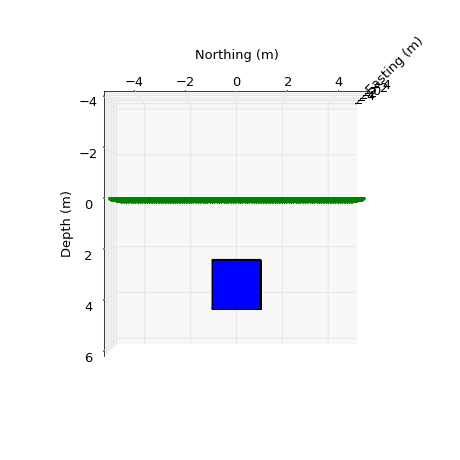

In [27]:
interact(plotObj3D,elev=(90.,270.,5.),azim=(-180.,180.,5.))

In [28]:
comp = 'tf'
irt = 'induced'

if comp is 'bx':
    fieldi = fatiandoMagPrism.bx(xp_eval,yp_eval,zp_eval,[p],fatiandoUtils.ang2vec(Mind, Einc-Binc, Edec-Bdec))
    fieldr = fatiandoMagPrism.bx(xp_eval,yp_eval,zp_eval,[p])
elif comp is 'by':
    fieldi = fatiandoMagPrism.by(xp_eval,yp_eval,zp_eval,[p],fatiandoUtils.ang2vec(Mind, Einc-Binc, Edec-Bdec))
    fieldr = fatiandoMagPrism.by(xp_eval,yp_eval,zp_eval,[p])
elif comp is 'bz':
    fieldi = fatiandoMagPrism.bz(xp_eval,yp_eval,zp_eval,[p],fatiandoUtils.ang2vec(Mind, Einc-Binc, Edec-Bdec))
    fieldr = fatiandoMagPrism.bz(xp_eval,yp_eval,zp_eval,zp,[p])
elif comp is 'tf':
    fieldi = fatiandoMagPrism.tf(xp_eval,yp_eval,zp_eval,[p],Einc-Binc,Edec-Bdec,fatiandoUtils.ang2vec(Mind, Einc-Binc, Edec-Bdec))
    fieldr = fatiandoMagPrism.tf(xp_eval,yp_eval,zp_eval,[p],Einc-Binc,Edec-Bdec)

fieldt = fieldi + fieldr

if irt is 'induced':
    field = fieldi
elif irt is 'remnant':
    field = fieldr
elif irt is 'total':
    field = fieldt

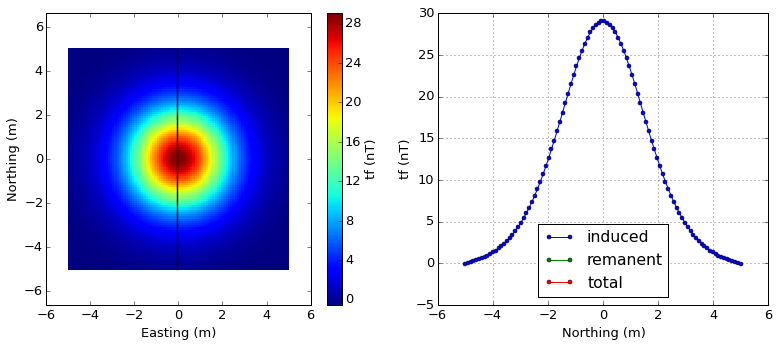

In [29]:
fig,ax = plt.subplots(1,2, figsize = (11, 5))
plt.rcParams.update({'font.size': 13})

# fig.canvas.draw()
im = ax[0].pcolor(xp.reshape(shape),yp.reshape(shape),field.reshape(shape))
ax[0].axis('equal')
# ax[0].axis('tight')

ax[0].set_xlabel('Easting (m)')
ax[0].set_ylabel('Northing (m)')
fig.colorbar(im,ax=ax[0],label=comp+' (nT)')

plotDataPoints = False
if plotDataPoints:
    ax[0].plot(xp,yp,'.',color='k')

# plot a line of data
xline = 0.
xvec = xp.reshape(shape)[:,0]
ind = np.min(np.nonzero(abs(xvec - xline) == abs(xvec - xline).min()))
ax[0].plot(xp.reshape(shape)[ind,:],yp.reshape(shape)[ind,:],'k',linewidth=1.4)

ax[1].plot(yp.reshape(shape)[ind,:],fieldi.reshape(shape)[ind,:],'o-',markersize=4)
ax[1].plot(yp.reshape(shape)[ind,:],fieldr.reshape(shape)[ind,:],'o-',markersize=4)
ax[1].plot(yp.reshape(shape)[ind,:],fieldt.reshape(shape)[ind,:],'o-',markersize=4)

ax[1].grid(which='both')
ax[1].set_ylabel(comp+' (nT)')
ax[1].set_xlabel('Northing (m)')
ax[1].legend(['induced','remanent','total'],loc='best')

plt.tight_layout()

In [30]:
# compare with sphere
from simpegPF import MagAnalytics

In [31]:
R = (((x2-x1)*(y2-y1)*(z2-z1))*3./(4.*np.pi))**(1./3.)
BxA, ByA, BzA = MagAnalytics.MagSphereAnaFun(zp+(z2+z1)/2.,xp,yp,R,0.,0.,0.,mu_0,2.*mu_0,  Higrf,'secondary')

0.795774715459


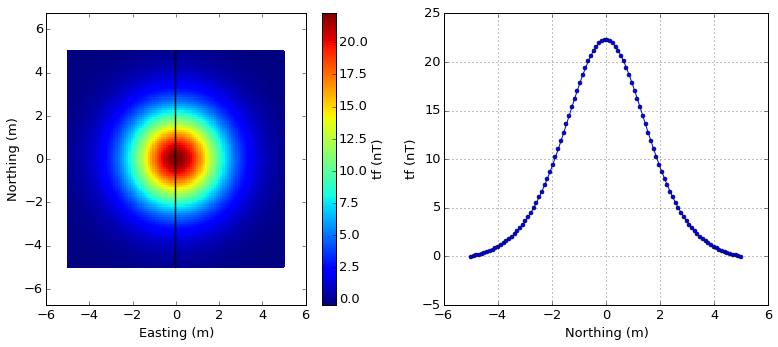

In [32]:
ana = BxA*1e9

fig,ax = plt.subplots(1,2, figsize = (11, 5))
plt.rcParams.update({'font.size': 13})

# fig.canvas.draw()
im = ax[0].pcolor(xp.reshape(shape),yp.reshape(shape),ana.reshape(shape))
ax[0].axis('equal')
# ax[0].axis('tight')

ax[0].set_xlabel('Easting (m)')
ax[0].set_ylabel('Northing (m)')
fig.colorbar(im,ax=ax[0],label=comp+' (nT)')

plotDataPoints = False
if plotDataPoints:
    ax[0].plot(xp,yp,'.',color='k')

# plot a line of data
xline = 0.
xvec = xp.reshape(shape)[:,0]
ind = np.min(np.nonzero(abs(xvec - xline) == abs(xvec - xline).min()))
ax[0].plot(xp.reshape(shape)[ind,:],yp.reshape(shape)[ind,:],'k',linewidth=1.4)

ax[1].plot(yp.reshape(shape)[ind,:],ana.reshape(shape)[ind,:],'o-',markersize=4)
# ax[1].plot(yp.reshape(shape)[ind,:],fieldr.reshape(shape)[ind,:],'o-',markersize=4)
# ax[1].plot(yp.reshape(shape)[ind,:],fieldt.reshape(shape)[ind,:],'o-',markersize=4)

ax[1].grid(which='both')
ax[1].set_ylabel(comp+' (nT)')
ax[1].set_xlabel('Northing (m)')
# ax[1].legend(['induced','remanent','total'],loc='best')

plt.tight_layout()

array([ 1.,  0.,  0.])